In [11]:
#-*- coding: utf-8 -*-
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.preprocessing import LabelEncoder

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [12]:

# 데이터 입력
df = pd.read_csv('../dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)


In [13]:

# 학습 셋과 테스트 셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,shuffle=True)



In [14]:

# 오리지날 모델 설정
## 모델 설계하기.
activation=tf.keras.activations.relu
ori_input_Layer = tf.keras.layers.Input(shape=(60,))
ori_x = tf.keras.layers.Dense(1000, activation=activation)(ori_input_Layer)
ori_x= tf.keras.layers.Dense(1000, activation=activation)(ori_x)
ori_x= tf.keras.layers.Dense(1000, activation=activation)(ori_x)
ori_x= tf.keras.layers.Dense(700, activation=activation)(ori_x)
ori_x= tf.keras.layers.Dense(700, activation=activation)(ori_x)
ori_x= tf.keras.layers.Dense(500, activation=activation)(ori_x)
ori_x= tf.keras.layers.Dense(500, activation=activation)(ori_x)
ori_x= tf.keras.layers.Dense(500, activation=activation)(ori_x)
ori_Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(ori_x)

model = tf.keras.Model(inputs=[ori_input_Layer], outputs=[ori_Out_Layer])
model.summary()

# 모델 컴파일
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=tf.keras.metrics.binary_accuracy
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])



Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_31 (Dense)             (None, 1000)              61000     
_________________________________________________________________
dense_32 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_33 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_34 (Dense)             (None, 700)               700700    
_________________________________________________________________
dense_35 (Dense)             (None, 700)               490700    
_________________________________________________________________
dense_36 (Dense)             (None, 500)               3505

In [15]:

############  경량화 모델
## 모델 설계하기.
small_input_Layer = tf.keras.layers.Input(shape=(60,))
small_x = tf.keras.layers.Dense(300, activation=activation)(small_input_Layer)
small_x= tf.keras.layers.Dense(100, activation=activation)(small_x)
small_x= tf.keras.layers.Dense(50, activation=activation)(small_x)
small_Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(small_x)

smaller_model = tf.keras.Model(inputs=[small_input_Layer], outputs=[small_Out_Layer])
smaller_model.summary()

# 모델 컴파일
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=tf.keras.metrics.binary_crossentropy
smaller_model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])

##############


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_40 (Dense)             (None, 300)               18300     
_________________________________________________________________
dense_41 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_42 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 51        
Total params: 53,501
Trainable params: 53,501
Non-trainable params: 0
_________________________________________________________________


In [16]:

####  regularizers 한 모델
regularizers_input_Layer = tf.keras.layers.Input(shape=(60,))
regularizers_x = tf.keras.layers.Dense(1000, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(regularizers_input_Layer)
regularizers_x = tf.keras.layers.Dense(1000, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(regularizers_x)
regularizers_x = tf.keras.layers.Dense(1000, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(regularizers_x)
regularizers_x= tf.keras.layers.Dense(700,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(regularizers_x)
regularizers_x= tf.keras.layers.Dense(700,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(regularizers_x)
regularizers_x= tf.keras.layers.Dense(500,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(regularizers_x)
regularizers_x= tf.keras.layers.Dense(500,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(regularizers_x)
regularizers_x= tf.keras.layers.Dense(500,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001))(regularizers_x)
regularizers_Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(regularizers_x)

regularizers_model = tf.keras.Model(inputs=[regularizers_input_Layer], outputs=[regularizers_Out_Layer])
regularizers_model.summary()

# 모델 컴파일
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=tf.keras.metrics.binary_crossentropy
regularizers_model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_44 (Dense)             (None, 1000)              61000     
_________________________________________________________________
dense_45 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_46 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_47 (Dense)             (None, 700)               700700    
_________________________________________________________________
dense_48 (Dense)             (None, 700)               490700    
_________________________________________________________________
dense_49 (Dense)             (None, 500)               3505

In [17]:

####  dropout 한 모델
dropout_input_Layer = tf.keras.layers.Input(shape=(60,))
dropout_x = tf.keras.layers.Dense(1000, activation='relu')(dropout_input_Layer)
dropout_x=tf.keras.layers.Dropout(0.5)(dropout_x)
dropout_x = tf.keras.layers.Dense(1000, activation='relu')(dropout_x)
dropout_x=tf.keras.layers.Dropout(0.5)(dropout_x)
dropout_x = tf.keras.layers.Dense(1000, activation='relu')(dropout_x)
dropout_x=tf.keras.layers.Dropout(0.5)(dropout_x)
dropout_x= tf.keras.layers.Dense(700,activation='relu')(dropout_x)
dropout_x=tf.keras.layers.Dropout(0.5)(dropout_x)
dropout_x= tf.keras.layers.Dense(700,activation='relu')(dropout_x)
dropout_x=tf.keras.layers.Dropout(0.5)(dropout_x)
dropout_x= tf.keras.layers.Dense(500,activation='relu')(dropout_x)
dropout_x=tf.keras.layers.Dropout(0.5)(dropout_x)
dropout_x= tf.keras.layers.Dense(500,activation='relu')(dropout_x)
dropout_x=tf.keras.layers.Dropout(0.5)(dropout_x)
dropout_x= tf.keras.layers.Dense(500,activation='relu')(dropout_x)
dropout_x=tf.keras.layers.Dropout(0.5)(dropout_x)
dropout_Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(dropout_x)

dropout_model = tf.keras.Model(inputs=[dropout_input_Layer], outputs=[dropout_Out_Layer])
dropout_model.summary()

# 모델 컴파일
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=tf.keras.metrics.binary_crossentropy
dropout_model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_53 (Dense)             (None, 1000)              61000     
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0   

In [18]:

####  batchnormalization 한 모델
batchnormal_input_Layer = tf.keras.layers.Input(shape=(60,))
batchnormal_x = tf.keras.layers.Dense(1000, activation=None)(batchnormal_input_Layer)
batchnormal_x = tf.keras.layers.Dense(1000, activation=None)(batchnormal_x)
batchnormal_x = tf.keras.layers.Activation('relu')(batchnormal_x)
batchnormal_x = tf.keras.layers.Dense(1000, activation=None)(batchnormal_x)
batchnormal_x = tf.keras.layers.Activation('relu')(batchnormal_x)
batchnormal_x= tf.keras.layers.Dense(700,activation=None)(batchnormal_x)
batchnormal_x = tf.keras.layers.BatchNormalization()(batchnormal_x)
batchnormal_x = tf.keras.layers.Activation('relu')(batchnormal_x)
batchnormal_x= tf.keras.layers.Dense(700,activation=None)(batchnormal_x)
batchnormal_x = tf.keras.layers.BatchNormalization()(batchnormal_x)
batchnormal_x = tf.keras.layers.Activation('relu')(batchnormal_x)
batchnormal_x= tf.keras.layers.Dense(500,activation=None)(batchnormal_x)
batchnormal_x = tf.keras.layers.BatchNormalization()(batchnormal_x)
batchnormal_x = tf.keras.layers.Activation('relu')(batchnormal_x)
batchnormal_x= tf.keras.layers.Dense(500,activation=None)(batchnormal_x)
batchnormal_x = tf.keras.layers.BatchNormalization()(batchnormal_x)
batchnormal_x = tf.keras.layers.Activation('relu')(batchnormal_x)
batchnormal_x= tf.keras.layers.Dense(500,activation=None)(batchnormal_x)
batchnormal_x = tf.keras.layers.BatchNormalization()(batchnormal_x)
batchnormal_x = tf.keras.layers.Activation('relu')(batchnormal_x)
batchnormal_Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(batchnormal_x)

batchnormal_model = tf.keras.Model(inputs=[batchnormal_input_Layer], outputs=[batchnormal_Out_Layer])
batchnormal_model.summary()

# 모델 컴파일

# 모델 컴파일
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=tf.keras.metrics.binary_crossentropy
batchnormal_model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])



Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_62 (Dense)             (None, 1000)              61000     
_________________________________________________________________
dense_63 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
activation_14 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
activation_15 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 700)               7007

In [19]:

# 모델 실행
model_hist=model.fit(X_train, Y_train, validation_split=0.2, epochs=500, batch_size=100)
smaller_model_hist=smaller_model.fit(X_train, Y_train,validation_split=0.2,epochs=500, batch_size=100)
regularizers_model_hist=regularizers_model.fit(X_train, Y_train,validation_split=0.2,epochs=500, batch_size=100)
dropout_model_hist=dropout_model.fit(X_train, Y_train,validation_split=0.2,epochs=500, batch_size=100)
batchnormal_model_hist=batchnormal_model.fit(X_train, Y_train,validation_split=0.2,epochs=500, batch_size=100)


Epoch 1/500
2/2 [==============================] - 1s 245ms/step - loss: 0.6931 - binary_crossentropy: 0.6931 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 2/500
2/2 [==============================] - 0s 23ms/step - loss: 0.6930 - binary_crossentropy: 0.6930 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 3/500
2/2 [==============================] - 0s 30ms/step - loss: 0.6930 - binary_crossentropy: 0.6930 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 4/500
2/2 [==============================] - 0s 28ms/step - loss: 0.6930 - binary_crossentropy: 0.6930 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931
Epoch 5/500
2/2 [==============================] - 0s 34ms/step - loss: 0.6930 - binary_crossentropy: 0.6930 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931
Epoch 6/500
2/2 [==============================] - 0s 37ms/step - loss: 0.6930 - binary_crossentropy: 0.6930 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 7/500
2/2 [==========

In [ ]:
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=tf.keras.metrics.binary_accuracy
batchnormal_model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])
batchnormal_model_hist=batchnormal_model.fit(X_train, Y_train,validation_split=0.2,epochs=2000, batch_size=100)

2/2 [==============================] - 0s 10ms/step - loss: 0.6918 - binary_crossentropy: 0.6918

 ori Test Accuracy: 0.6918
2/2 [==============================] - 0s 5ms/step - loss: 5.8922 - binary_crossentropy: 0.6916

 dropout Test Accuracy: 0.6916
2/2 [==============================] - 0s 3ms/step - loss: 0.6732 - binary_crossentropy: 0.6732

 smaller Test Accuracy: 0.6732


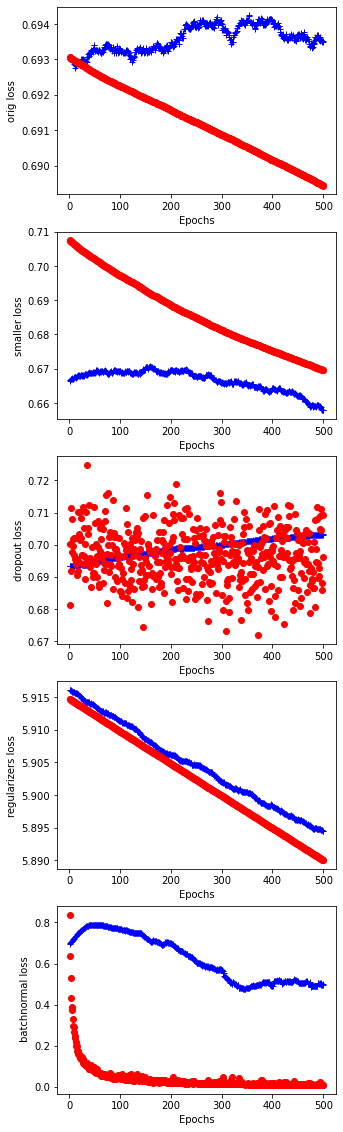

In [20]:

fig, ax = plt.subplots( 5, 1,figsize=(5,20))

epochs = range(1, 501)
original_val_loss = model_hist.history['val_loss']
original_loss = model_hist.history['loss']
ax[0].plot(epochs, original_val_loss, 'b+', label='val_loss')
# ‘bo’는 파란색 점을 의미합니다
ax[0].plot(epochs, original_loss, 'ro', label='loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('orig loss')

epochs = range(1, 501)
smaller_model_val_loss = smaller_model_hist.history['val_loss']
smaller_model_loss = smaller_model_hist.history['loss']
ax[1].plot(epochs, smaller_model_val_loss, 'b+', label='val_loss')
# ‘bo’는 파란색 점을 의미합니다
ax[1].plot(epochs, smaller_model_loss, 'ro', label='loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('smaller loss')


epochs = range(1, 501)
dropout_model_val_loss = dropout_model_hist.history['val_loss']
dropout_model_loss = dropout_model_hist.history['loss']
ax[2].plot(epochs, dropout_model_val_loss, 'b+', label='val_loss')
# ‘bo’는 파란색 점을 의미합니다
ax[2].plot(epochs, dropout_model_loss, 'ro', label='loss')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('dropout loss')

epochs = range(1, 501)
regularizers_model_val_loss = regularizers_model_hist.history['val_loss']
regularizers_model_loss = regularizers_model_hist.history['loss']
ax[3].plot(epochs, regularizers_model_val_loss, 'b+', label='val_loss')
# ‘bo’는 파란색 점을 의미합니다
ax[3].plot(epochs, regularizers_model_loss, 'ro', label='loss')
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('regularizers loss')

epochs = range(1, 501)
batchnormal_model_val_loss = batchnormal_model_hist.history['val_loss']
batchnormal_model_loss = batchnormal_model_hist.history['loss']
ax[4].plot(epochs, batchnormal_model_val_loss, 'b+', label='val_loss')
# ‘bo’는 파란색 점을 의미합니다
ax[4].plot(epochs, batchnormal_model_loss, 'ro', label='loss')
ax[4].set_xlabel('Epochs')
ax[4].set_ylabel(' batchnormal loss')


# 테스트셋에 모델 적용
print("\n ori Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))
# 테스트셋에 모델 적용
print("\n dropout Test Accuracy: %.4f" % (regularizers_model.evaluate(X_test, Y_test)[1]))
# 테스트셋에 모델 적용
print("\n smaller Test Accuracy: %.4f" % (smaller_model.evaluate(X_test, Y_test)[1]))

plt.show()